# Speed Dating - Part I

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
from plotly.subplots import make_subplots 
import plotly.offline as py
pio.renderers.default = "svg"



# Exploring the data

In [2]:
path_to_file="/Users/saas1/OneDrive/Escritorio/introduction_to_ python_for_data_science/Projects/Project_2"
raw_data=pd.read_excel(path_to_file +"/Speed Dating Data.xlsx")

In [3]:
raw_data

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [4]:
print(raw_data.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(12), object(8)
memory usage: 12.5+ MB


In [6]:
raw_data.shape

(8378, 195)

# OK let's make this data analysis challenge more interesting: 

There is a book called the reddest rose (in French: la rose la plus rouge s'epanouit) written by Liv Strömquist. 
The writer tried to explain why Leo Di Caprio has never been able to fall in love. 
I have not completely read this book but there are some theories of this book that I would like to check on this dataframe:

1- Women do not date people younger than them / Men in the other hand date women younger than them  

2- Women date man with higher or equivalent education/income but not less / Men are the oposite

in addition to that I'll like to check:

3- Which are the fields that have more succes? (maybe I should change my job)

4- How often do the women call ?

5- Is the race an important factor ?


Some important that columns will help me:

- iid: unique subject number, group(wave id gender)
- id: subject number within wave
- gender: Female=0 / Male=1
- round: number of people that met in wave
- order: the number of date that night when met partner
- pid: partner’s iid number
- match: 1=yes, 0=no
- samerace: participant and the partner were the same race. 1= yes, 0=no
- age_o: age of partner
- race_o: race of partner
- age: age of the participant
- race: race of the participant
- expnum: How many matches the daters expected to receive?
- numdat_3: How many of your matches have you been on a date with so far?
- goal: What is your primary goal in participating in this event? 
- field_cd: field coded 
- income: Median household income based on zipcode using the Census Bureau website
- you_call: How many have you contacted to set up a date?
- them_cal: How many have contacted you?
- date_3: Have you been on a date with any of your matches? Yes=1/No=2
- num_in_3: If yes, how many?
- attr3_s : Attractive (1-10) your own opinion
- sinc3_s: Sincere (1-10) your own opinion
- intel3_s: Intelligent (1-10) your own opinion
- fun3_s: Fun (1-10) your own opinion
- amb3_s: Ambitious (1-10) your own opinion

#### Let's do some standard verification of the data

In [7]:
pd.isnull(raw_data).sum().sort_values(ascending=False).to_dict()

{'num_in_3': 7725,
 'numdat_3': 6897,
 'expnum': 6578,
 'sinc7_2': 6438,
 'amb7_2': 6438,
 'shar7_2': 6419,
 'attr7_2': 6409,
 'intel7_2': 6409,
 'fun7_2': 6409,
 'amb5_3': 6377,
 'attr7_3': 6377,
 'sinc7_3': 6377,
 'intel7_3': 6377,
 'fun7_3': 6377,
 'amb7_3': 6377,
 'shar7_3': 6377,
 'shar2_3': 6377,
 'attr5_3': 6377,
 'sinc5_3': 6377,
 'intel5_3': 6377,
 'fun5_3': 6377,
 'attr4_3': 5434,
 'sinc4_3': 5434,
 'intel4_3': 5434,
 'fun4_3': 5434,
 'amb4_3': 5434,
 'shar4_3': 5434,
 'intel2_3': 5434,
 'sinc2_3': 5434,
 'attr2_3': 5434,
 'amb2_3': 5434,
 'fun2_3': 5434,
 'mn_sat': 5245,
 'tuition': 4795,
 'sinc1_3': 4419,
 'attr1_3': 4419,
 'you_call': 4419,
 'intel1_3': 4419,
 'fun1_3': 4419,
 'amb1_3': 4419,
 'shar1_3': 4419,
 'attr3_3': 4419,
 'them_cal': 4419,
 'sinc3_3': 4419,
 'intel3_3': 4419,
 'fun3_3': 4419,
 'amb3_3': 4419,
 'date_3': 4419,
 'fun3_s': 4393,
 'amb3_s': 4393,
 'intel3_s': 4393,
 'sinc3_s': 4393,
 'attr3_s': 4393,
 'shar1_s': 4297,
 'attr1_s': 4297,
 'sinc1_s': 4297,

In [8]:
raw_data.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [9]:
a=len(raw_data)
print('The total number of dates is {}'.format(a))

b=len(raw_data['iid'].unique())
print('The total number of participants is {}'.format(b))

c=raw_data['age'].mean()
print('The average age of the participants is {}'.format(c))

The total number of dates is 8378
The total number of participants is 551
The average age of the participants is 26.358927924664975


# Preparing the data

In [10]:
df_clean=raw_data.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(12), object(8)
memory usage: 12.5+ MB


Let's convert the gender column 

In [11]:
df_clean["gender"]=df_clean["gender"].apply(lambda x: "Female" if x==0 else "Male")

Let's convert the race column

In [12]:
race_replace={1:"Black/African American", 2: "European/Caucasion-American", 3: "Latino/Hispanic American",
                4: "Asian/Pacific Islander/Asian-American",5: "Native American",6: "Other"}
df_clean["race"].replace(race_replace, inplace=True)


Let's convert the field column

In [13]:
field_replace={1:"Law",2:"Math", 3:"Social Science, Psychologist",4:"Medican Science, Pharmaceuticals, and Bio Tech", 5:"Engineering",
6:"English/Creative Writing / Journalism", 7:"History/ Religion/ Philosophy", 8:"Business/Econ/Finance", 9:"Education, Academia",
10:"Biological Sciences / Chemistry/ Physics", 11:"Social Work", 12:"Undergrad/undecided", 13:"Political Science/ International Affairs",
14:"Film", 15:"Fine Arts / Arts Administration",16:"Languages",17:"Architecture", 18:"Other"}

df_clean["field_cd"].replace(field_replace, inplace=True)

Let's drop the na values in the columns age, iid and gender

In [14]:
df_clean=df_clean.dropna(subset=['age', 'iid',"gender"])
df_clean.shape

(8283, 195)

Let's check the average age of the participants by gender

In [15]:
df_clean.pivot_table(index='iid',columns='gender',values='age').mean()

gender
Female    26.126394
Male      26.587591
dtype: float64

Let's check the number of participants by gender

In [16]:
df_clean.pivot_table(index='iid',columns='gender',values='age').count()

gender
Female    269
Male      274
dtype: int64

Let's check the number of dates by gender

In [17]:
df_clean.groupby(["gender"])['iid'].count()

gender
Female    4119
Male      4164
Name: iid, dtype: int64

Let's check the number of matches by gender

In [18]:
df_clean.groupby(["gender"])['match'].sum()

gender
Female    680
Male      682
Name: match, dtype: int64

Let's check the % of total matches per gender

In [19]:
df_clean.groupby(["gender"])['match'].agg(lambda x: x.eq(1).sum()/x.count())

gender
Female    0.165089
Male      0.163785
Name: match, dtype: float64

Let's check the which gender contacted more people to set up a date

In [20]:
df_clean.groupby(["iid","gender"])['you_call'].first().groupby(["gender"]).sum()

gender
Female     41.0
Male      153.0
Name: you_call, dtype: float64

Let's check the which gender received more call

In [21]:
df_clean.groupby(["iid","gender"])['them_cal'].first().groupby(["gender"]).sum()

gender
Female    169.0
Male       62.0
Name: them_cal, dtype: float64

In [22]:
df_clean.groupby(["iid","gender"])['numdat_3'].first().groupby(["gender"]).sum()

gender
Female    61.0
Male      47.0
Name: numdat_3, dtype: float64

Let's check the number of participants by race

In [23]:
df_clean.pivot_table(index='iid',columns='race',values='age').count()

race
Asian/Pacific Islander/Asian-American    136
Black/African American                    26
European/Caucasion-American              302
Latino/Hispanic American                  42
Other                                     37
dtype: int64

Let's check the number of dates by race

In [24]:
df_clean.groupby(["race"])['iid'].count()

race
Asian/Pacific Islander/Asian-American    1982
Black/African American                    420
European/Caucasion-American              4695
Latino/Hispanic American                  664
Other                                     522
Name: iid, dtype: int64

Let's check the number of matches by race

In [25]:
df_clean.groupby(["race"])['match'].sum()

race
Asian/Pacific Islander/Asian-American    267
Black/African American                    85
European/Caucasion-American              784
Latino/Hispanic American                 123
Other                                    103
Name: match, dtype: int64

Let's check the % of total matches per race

In [26]:
df_clean.groupby(["race"])['match'].agg(lambda x: x.eq(1).sum()/x.count())

race
Asian/Pacific Islander/Asian-American    0.134712
Black/African American                   0.202381
European/Caucasion-American              0.166986
Latino/Hispanic American                 0.185241
Other                                    0.197318
Name: match, dtype: float64

# Speed Dating - Part II

Let's try to produce our first visualisations with Seaborn. Based on the exploration you realized, try to find relationships between variables. 

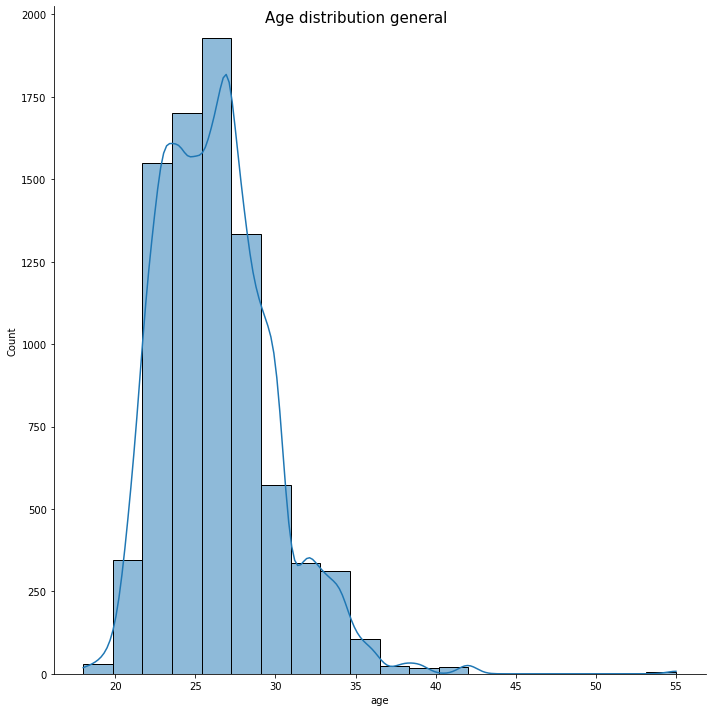

In [27]:
fig=sns.displot(df_clean["age"],kde=True,bins=20,height= 10);
fig.fig.suptitle('Age distribution general', fontsize=15);

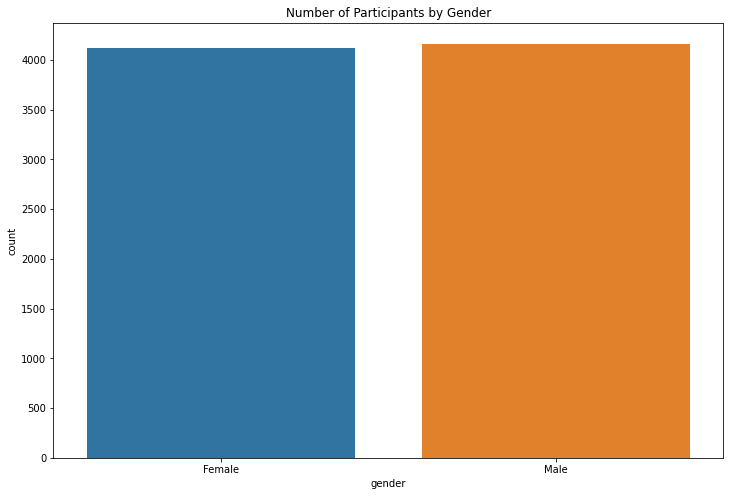

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender', data=df_clean).set(title='Number of Participants by Gender');

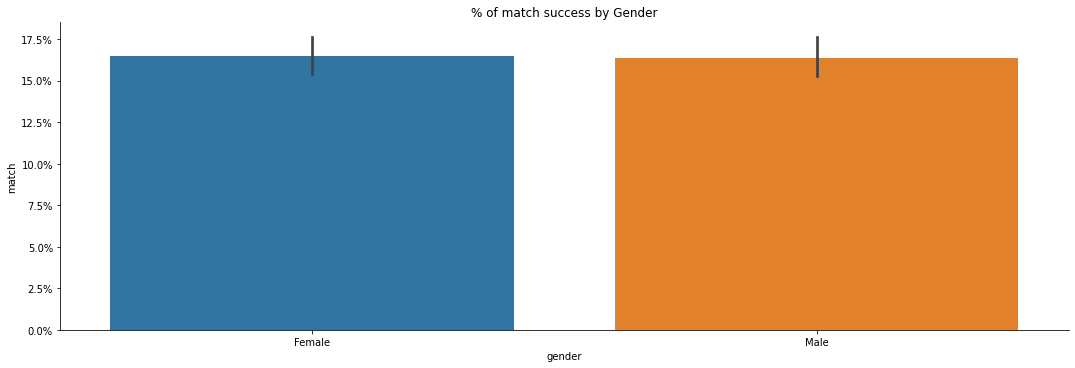

In [29]:
fig=sns.catplot(x="gender", y="match", kind="bar", data=df_clean,aspect=3,height=5).set(title='% of match success by Gender');

for ax in fig.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
 

[Text(0.5, 1.0, 'Boxplot distribution Age by Gender & Race')]

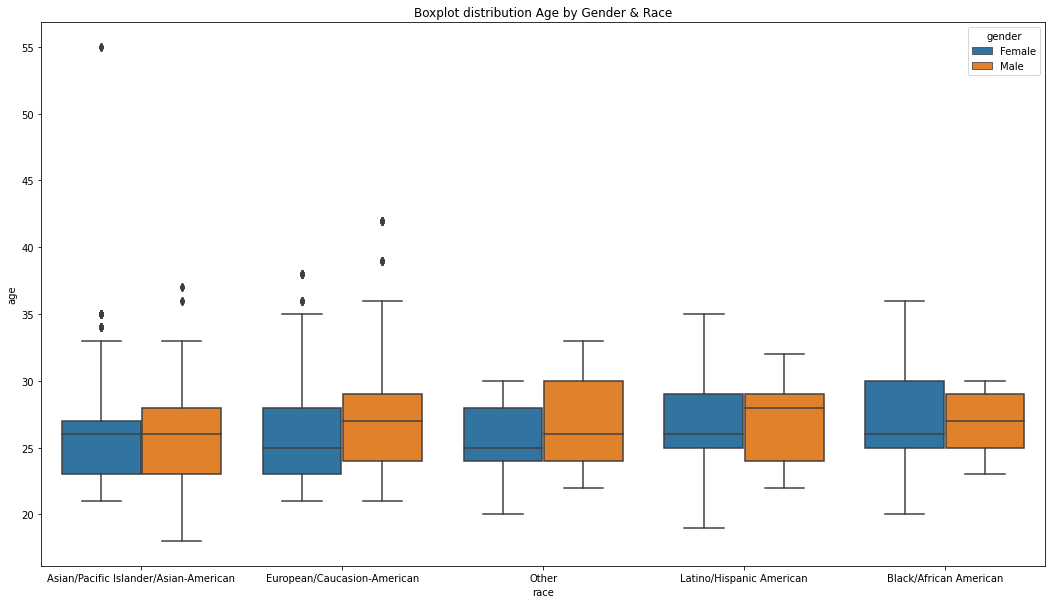

In [30]:
plt.figure(figsize=(18,10))

sns.boxplot(x="race",y="age",hue="gender",data=df_clean).set(title='Boxplot distribution Age by Gender & Race')

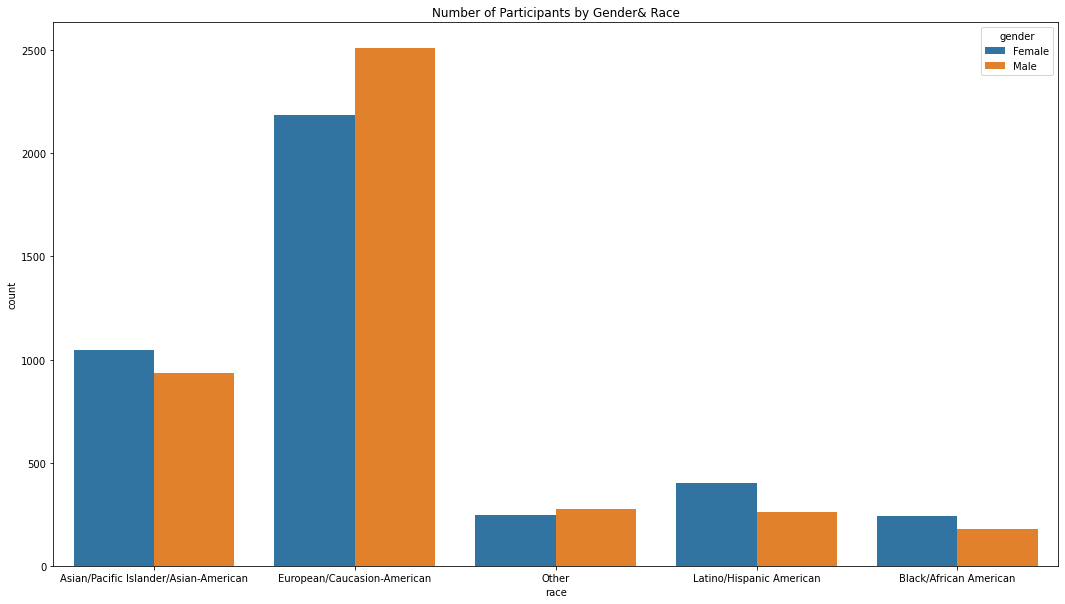

In [31]:
plt.figure(figsize=(18,10))
g= sns.countplot(x='race', hue="gender",data=df_clean).set(title='Number of Participants by Gender& Race');



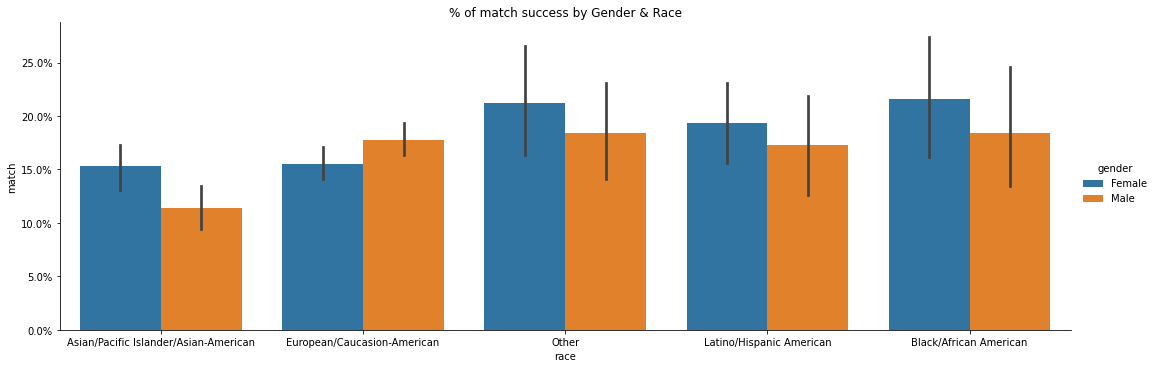

In [32]:
fig=sns.catplot(x="race", y="match", kind="bar",hue="gender", data=df_clean,aspect=3,height=5).set(title='% of match success by Gender & Race');

for ax in fig.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

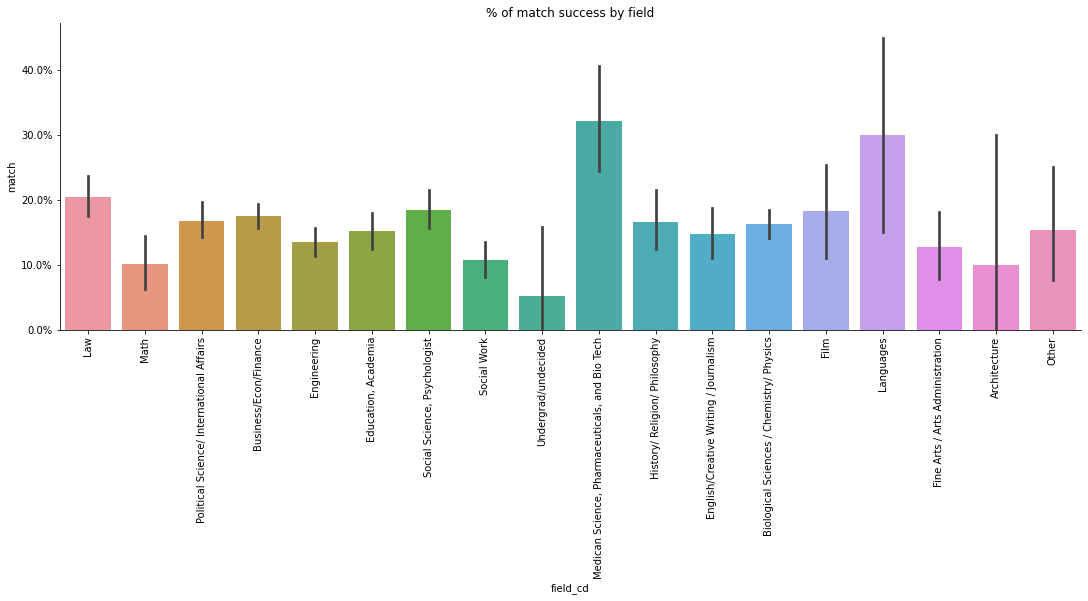

In [33]:
g=sns.catplot(x="field_cd", y="match", kind="bar", data=df_clean,aspect=3,height=5).set(title='% of match success by field');
g.set_xticklabels(rotation=90);


for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

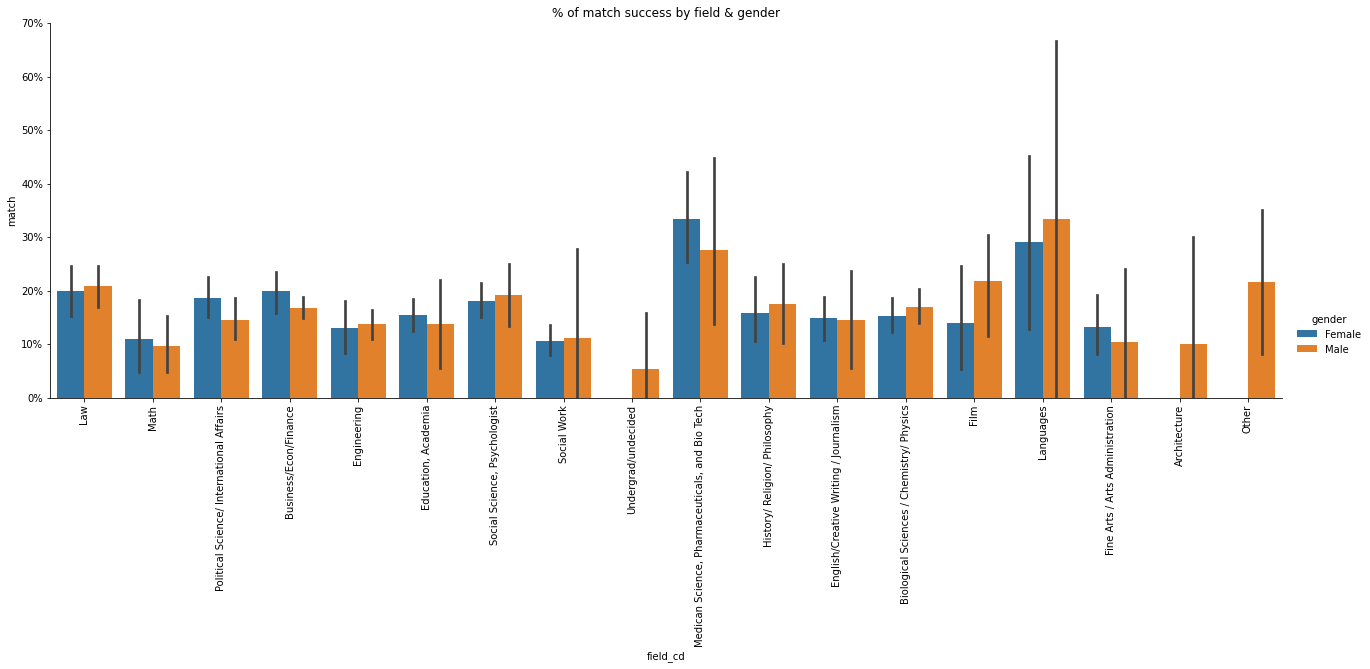

In [34]:
g=sns.catplot(x="field_cd", y="match", kind="bar",hue="gender", data=df_clean,aspect=3,height=6).set(title='% of match success by field & gender');
g.set_xticklabels(rotation=90);

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



In [35]:
df_clean["income"]=df_clean["income"].str.replace(',', '').fillna(0).astype(float).astype(int)
mask=df_clean["income"]>1000
df_income=df_clean[mask]

[Text(0.5, 1.0, 'Boxplot distribution Income by Gender')]

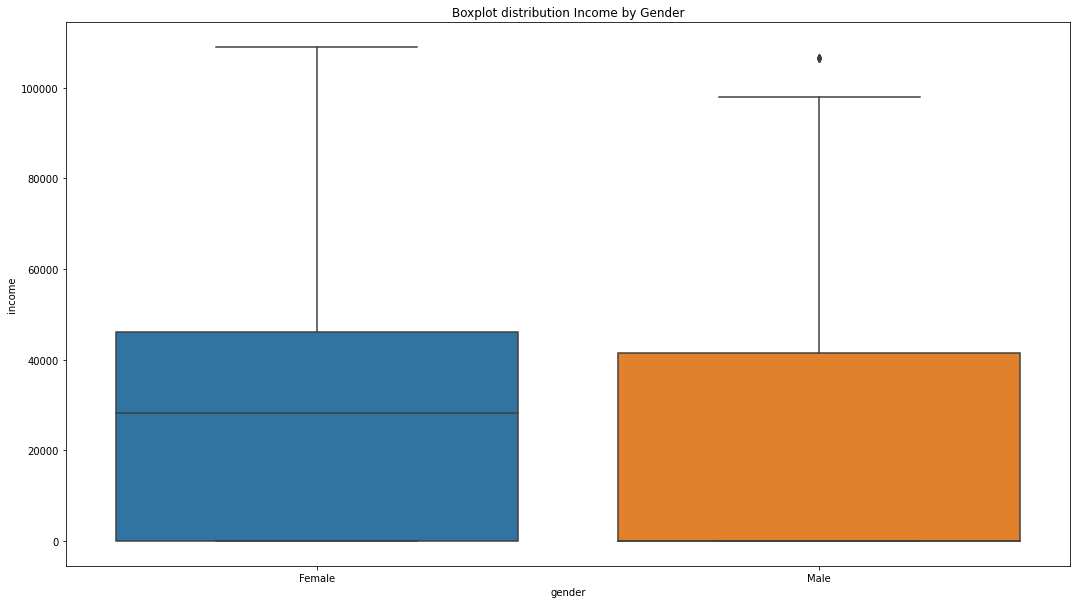

In [36]:
plt.figure(figsize=(18,10))

sns.boxplot(x="gender",y="income",data=df_clean).set(title='Boxplot distribution Income by Gender')

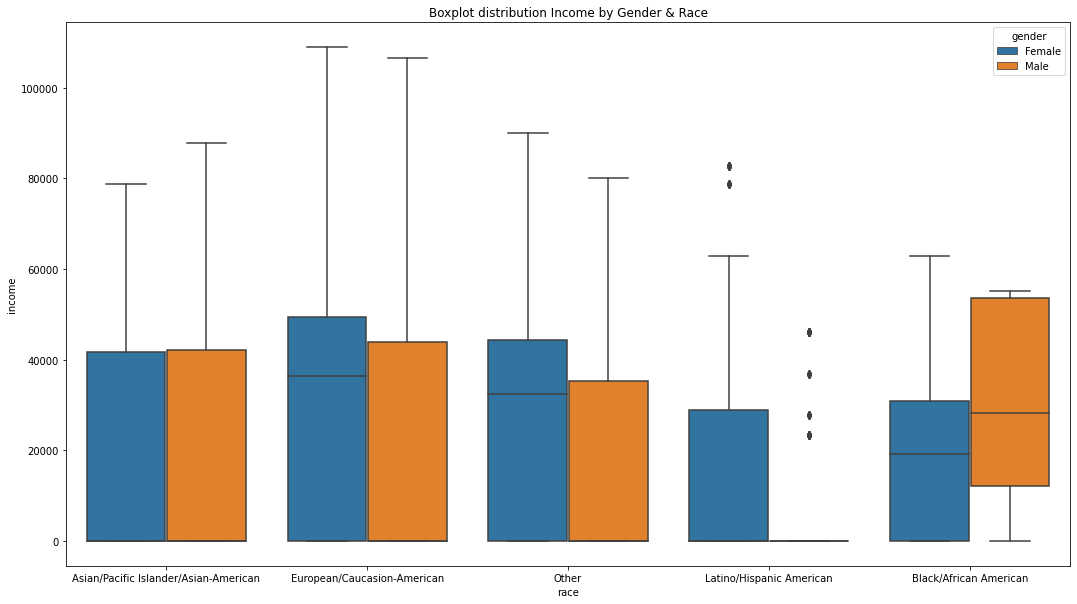

In [37]:
plt.figure(figsize=(18,10))

sns.boxplot(x="race",y="income",hue="gender",data=df_clean).set(title='Boxplot distribution Income by Gender & Race');

### is the Male income important to have a match?

In [38]:
mask_2=df_income["gender"]=="Male"

df_income_male=df_income[mask_2]

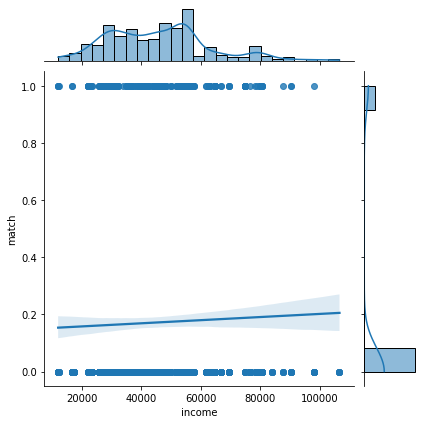

In [39]:
sns.jointplot(x="income", y="match", data=df_income_male, kind="reg");

In [40]:
score_card_info= df_clean[df_clean.columns[97:107]]
mask=score_card_info["met"]==2
score_card_info=score_card_info[mask]
score_card_info=score_card_info.drop(columns="met")

In [41]:
score_card_info

,dec,attr,sinc,intel,fun,amb,shar,like,prob
0,1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
3,1.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0
5,0.0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0
6,1.0,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...
6799,0.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
6800,0.0,5.0,4.0,6.0,4.0,6.0,6.0,5.0,4.0
6801,0.0,5.0,4.0,6.0,6.0,5.0,5.0,4.0,4.0
6802,1.0,6.0,5.0,6.0,4.0,5.0,4.0,5.0,4.0


In [42]:
corre=score_card_info.corr()

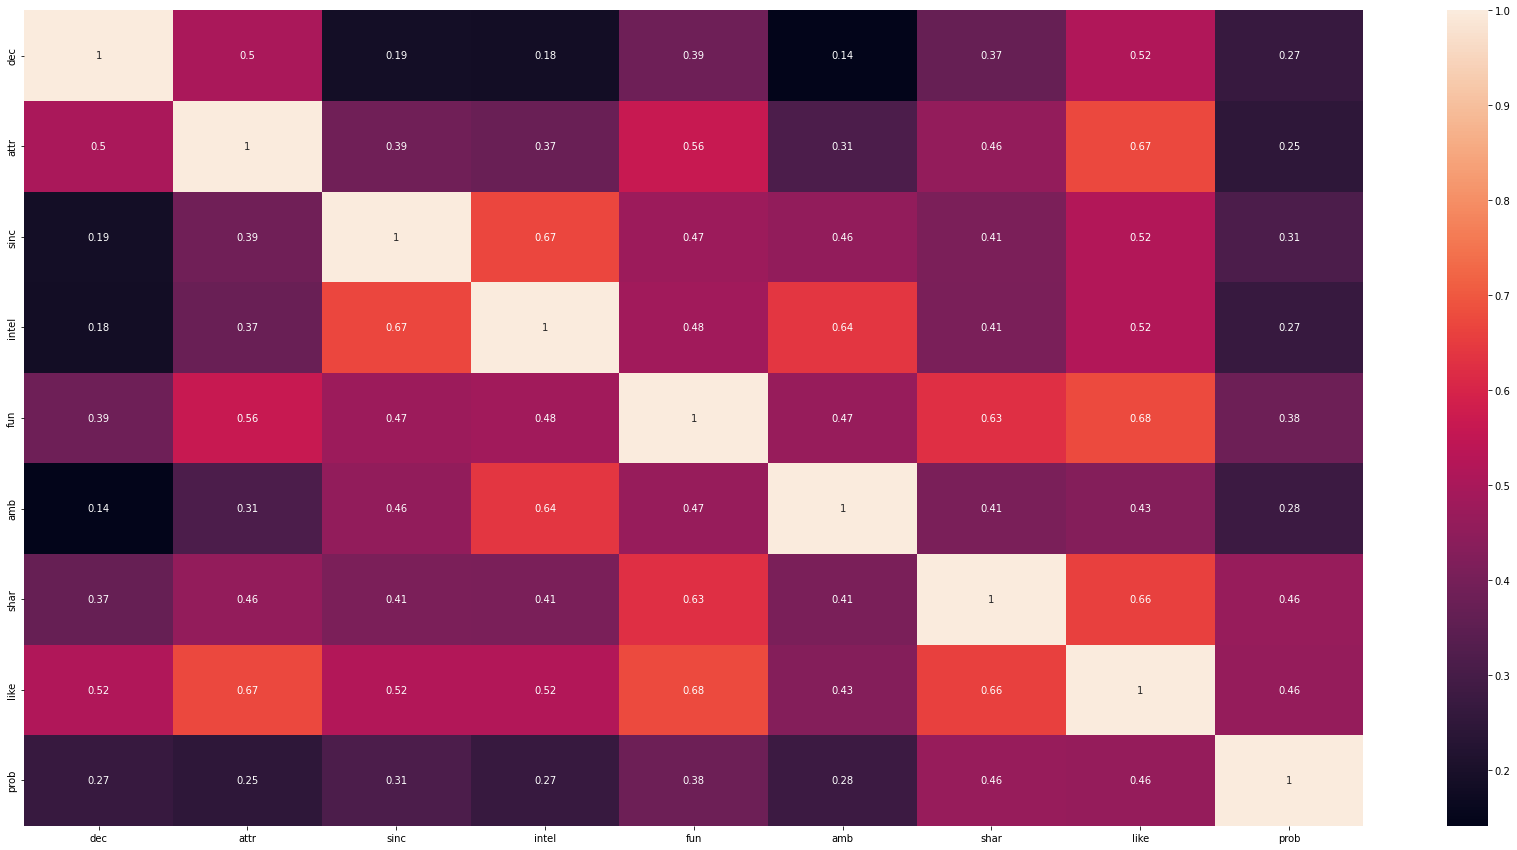

In [43]:
f, ax = plt.subplots(figsize=(30, 15)) # create a "sheet" to have bigger graph
sns.heatmap(corre, annot=True, ax=ax);

In [44]:
corre["dec"]=abs(corre["dec"])
s=corre["dec"]
s.sort_values(ascending=False)

dec      1.000000
like     0.515364
attr     0.501720
fun      0.385901
shar     0.366630
prob     0.267803
sinc     0.187511
intel    0.181908
amb      0.141105
Name: dec, dtype: float64

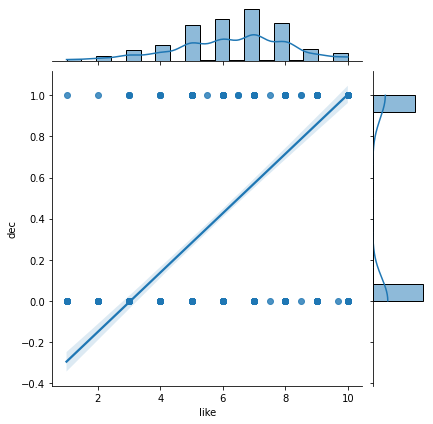

In [45]:
sns.jointplot(x="like", y="dec", data=df_income_male, kind="reg");

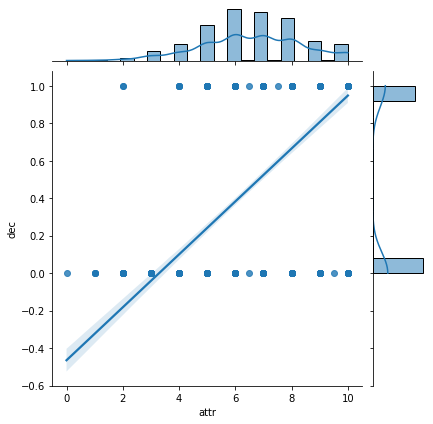

In [46]:
sns.jointplot(x="attr", y="dec", data=df_income_male, kind="reg");

In [47]:
#general_information= df_clean[df_clean.columns[:69]]
#general_information.columns.to_list
#general information columns 0 to 68(included)
#df_final=pd.melt(df_clean, id_vars=df_clean.columns[:69], value_vars=df_clean.columns[69:], 
                #var_name="survey", value_name="responses")

# Speed Dating - Part III

Let's finalize our project by adding some interactivity to it. 

👉 Present then your project to your fellow students. 

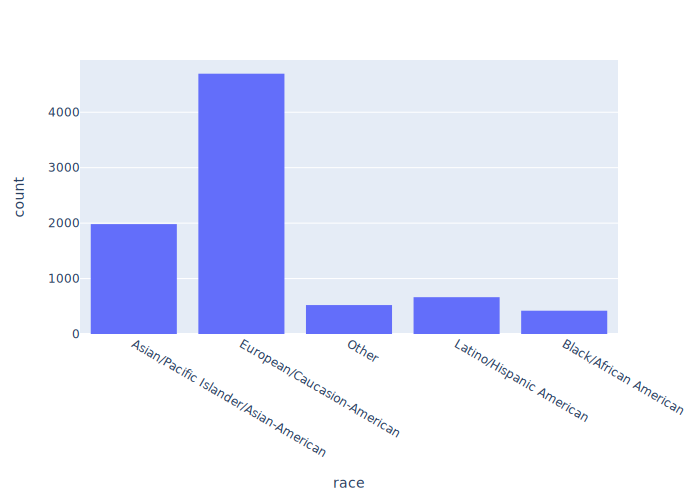

In [48]:
fig=px.histogram(df_clean,"race")
fig.show()

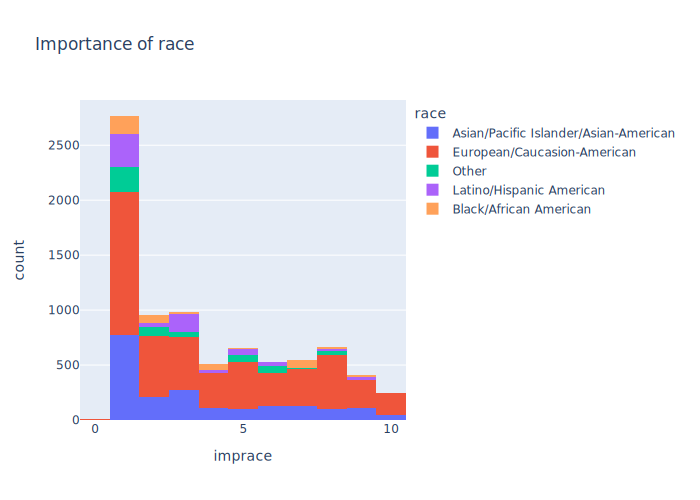

In [49]:
fig=px.histogram(df_clean,x='imprace',color='race',title="Importance of race");
fig.show()

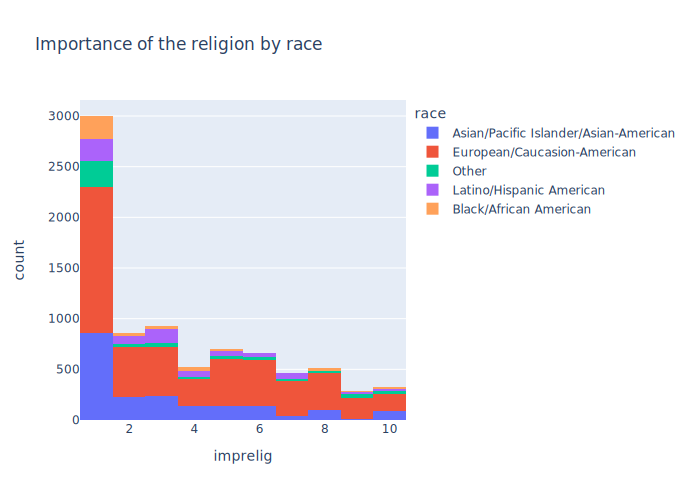

In [50]:
fig=px.histogram(df_clean,x='imprelig',color='race',title="Importance of the religion by race");
fig.show()

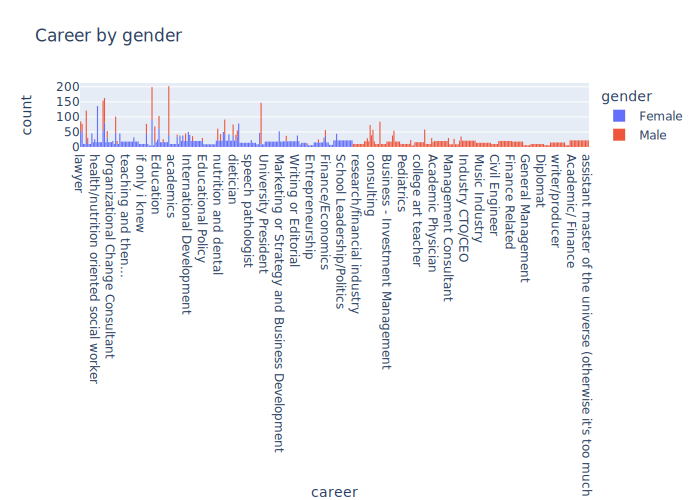

In [51]:
fig=px.histogram(df_clean,x='career',color='gender',title="Career by gender");
fig.show()

In [52]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = df_clean.groupby(['gender']).mean()[activities_interested].values


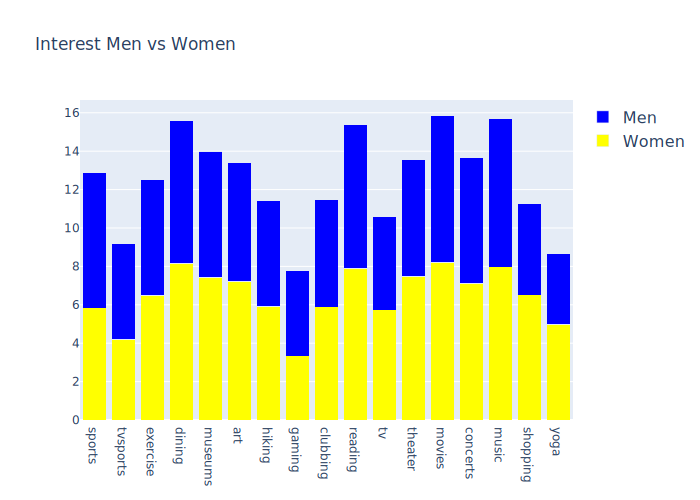

In [53]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,],
    name='Women',
    marker=dict(
        color='yellow'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,],
    name='Men',
    marker=dict(
        color='blue'
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Interest Men vs Women',
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='barchart')